# Social Graphs and Interactions (02805) - Assignment 1
## Group 107
| Parts                   | Contributor          |
|-------------------------|----------------------|
| Assignment 1.1:         | Adam Ajane (s211048) |
| Assignment 1.2, part 2: | Arun Kumar Dhuraisamy (s242529) |
| Assignment 1.2, part 3: |   Vasiliki Tsanaktsidou (s232489)                   |

In [1]:
# Imports
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import warnings
import os
import requests
from io import BytesIO

## Assignment 1.1: Exploring the WS and BA Models

### Part 1: Watts-Strogatz (WS) and Barabasi-Albert (BA) Models

#### Exercise 1.1: Questions about Chapter 3, Sections 3.5-3.10

**Problem with modeling real-world networks with random networks:**

The issue is that random networks don’t capture how real-world networks actually look and behave. In real life, networks (like social or biological ones) have hubs, clustering, and non-random structures. Random networks spread links too evenly, so they miss those patterns of real-world networks.

**The four regimes characterizing random networks as a function of $<k>$**

There are four regimes in the evolution of a random network:
- **Subcritical regime** $0<k_{avg}<1$ and $(p < \frac{1}{n})$
  - Graph consists mostly of small, disconnected components
  - No giant component
  - Largest component size grows like $\log(n)$
- **Critical regime** $k_{avg}=1$ and $(p \approx \frac{1}{n})$
  - Phase transition point
  - A "giant component" of size $\sim n^{\frac{2}{3}}$ emerges
- **Supercritical regime** $k_{avg}>1$ and $(\frac{1}{n} < p < \frac{\log n}{n})$
  - A giant component forms, containing a positive fraction of all nodes
  - Remaining nodes are in small tree-like components
- **Connected regime** $k_{avg}>\ln(n)$ and $(p \geq \frac{\log n}{n})$
  - Graph becomes connected with high probability
  - Almost every node belongs to the giant component

**Problem with degree-dependent clustering decreasing as a function of $k$**

In real-world networks, clustering depends on degree: nodes with low degree tend to cluster more, and hubs cluster less. Random networks don’t show this. Instead, they basically give the same clustering regardless of degree. So they miss an important structural feature of real networks.

#### Exercise 1.2: The Watts-Strigatz (WS) Model

In [5]:
# Network properties
N = 300
k = 4
p_values = [0, 0.1, 1]

# Exercise 1.2.1

# Create WS graphs for different p values
WS_graphs = {}
for p in p_values:
    WS_graphs[p] = nx.watts_strogatz_graph(N, k, p)

# Calculates shortest path of the 3 graphs
for g in WS_graphs:
    print(
        f"Shortest path of graph p={g}: {nx.average_shortest_path_length(WS_graphs[g]):.2f}"
    )

Shortest path of graph p=0: 37.88
Shortest path of graph p=0.1: 7.09
Shortest path of graph p=1: 4.32


Exercise 1.2.2

At p = 1, we go from a structured network to a completely random one. At lower values of p, we have more "rigid" or regular networks. At p = 0, we have a regular lattice, and at p = 0.1, we have a model of the small-world problem. At p = 1, the structure in the network disintegrates and becomes completely random. The shortest path is rather low due to the tendency of random networks having short paths.

In [3]:
# Exercise 1.2.3

# Networks with various values of p
dense_p_values = [i / 100 for i in range(0, 101)]  # p-values from 0.00 to 1.00
ws_path_lengths = {}

for p in dense_p_values:
    G_tmp = nx.watts_strogatz_graph(N, k, p)
    ws_path_lengths[p] = nx.average_shortest_path_length(G_tmp)

for p in dense_p_values:
    print(f"p={p:.2f} avg_shortest_path={ws_path_lengths[p]:.4f}")

p=0.00 avg_shortest_path=37.8763
p=0.01 avg_shortest_path=18.7190
p=0.02 avg_shortest_path=15.3561
p=0.03 avg_shortest_path=13.8724
p=0.04 avg_shortest_path=9.0239
p=0.05 avg_shortest_path=8.8020
p=0.06 avg_shortest_path=7.4934
p=0.07 avg_shortest_path=7.1775
p=0.08 avg_shortest_path=7.1612
p=0.09 avg_shortest_path=7.4131
p=0.10 avg_shortest_path=6.5517
p=0.11 avg_shortest_path=6.5580
p=0.12 avg_shortest_path=6.5260
p=0.13 avg_shortest_path=6.0497
p=0.14 avg_shortest_path=6.1319
p=0.15 avg_shortest_path=6.0484
p=0.16 avg_shortest_path=5.8716
p=0.17 avg_shortest_path=5.7906
p=0.18 avg_shortest_path=5.6592
p=0.19 avg_shortest_path=5.4194
p=0.20 avg_shortest_path=5.4618
p=0.21 avg_shortest_path=5.5750
p=0.22 avg_shortest_path=5.2827
p=0.23 avg_shortest_path=5.1468
p=0.24 avg_shortest_path=5.4602
p=0.25 avg_shortest_path=5.2346
p=0.26 avg_shortest_path=5.0283
p=0.27 avg_shortest_path=5.2518
p=0.28 avg_shortest_path=5.1290
p=0.29 avg_shortest_path=4.9793
p=0.30 avg_shortest_path=4.9572
p=0.

In the fully randomized network ($p = 1$) from exercise 1.2.1, we get a shortest path of $\approx 4.30$. At around $p = 0.31$, we get a shortest path of $4.9109$ and consistently get a distance below $5$ as we increase $p$. At $p = 0.68$ and subsequent increments in $p$, we are steadily remain in the $4.30-40$ range.

Average distance of graph p=0: 62.88
Standard deviation of shortest path for p=0: 0.00
Average distance of graph p=0.01: 23.12
Standard deviation of shortest path for p=0.01: 4.06
Average distance of graph p=0.03: 13.23
Standard deviation of shortest path for p=0.03: 1.35
Average distance of graph p=0.04: 11.39
Standard deviation of shortest path for p=0.04: 0.98
Average distance of graph p=0.1: 7.68
Standard deviation of shortest path for p=0.1: 0.29
Average distance of graph p=0.2: 6.12
Standard deviation of shortest path for p=0.2: 0.11


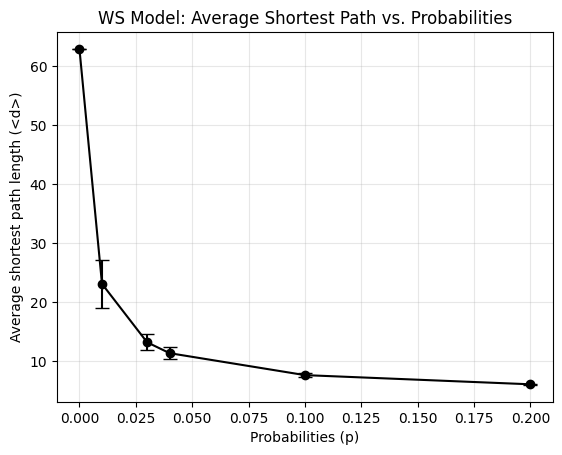

In [4]:
# Exercsie 1.2.4

# Network properties
N_2 = 500
k_2 = 4
p_2_values = [0, 0.01, 0.03, 0.04, 0.1, 0.2]

WS_graphs_2 = {}

# Generate 50 graphs for each of the p-values
for p in p_2_values:
    WS_graphs_2[p] = [nx.watts_strogatz_graph(N_2, k_2, p) for _ in range(50)]

avg_distances = []
std_devs = []

# Calculate average shortest path and standard deviation for each graph
for p in p_2_values:
    avg_paths = [nx.average_shortest_path_length(_) for _ in WS_graphs_2[p]]
    avg_path = sum(avg_paths) / len(avg_paths)
    avg_distances.append(np.mean(avg_paths))
    std_dev = np.std(avg_paths)
    std_devs.append(np.std(avg_paths))
    print(f"Average distance of graph p={p}: {avg_path:.2f}")
    print(f"Standard deviation of shortest path for p={p}: {std_dev:.2f}")

# Plotting distances
plt.errorbar(
    p_2_values, avg_distances, yerr=std_devs, fmt="o-", capsize=5, color="black"
)
plt.xlabel("Probabilities (p)")
plt.ylabel("Average shortest path length (<d>)")
plt.title("WS Model: Average Shortest Path vs. Probabilities")
plt.grid(alpha=0.3)
plt.show()

This plot shows how the average shortest path length ($<d>$) in a Watts-Strogatz (WS) network with $N=500$ nodes and $k=4$ neighbors changes as the rewiring probability $p$ increases. Each point is the mean over 50 random WS graphs for each $p$ value, with error bars showing the standard deviation. The plot shows the rapid drop in path length as $p$ increases from 0 (regular lattice) to small values which clearly shows the "small-world" effect (little randomness reduces distance between nodes significantly).

#### Exercise 1.2: The Barabasi-Albert (BA) Model

**The three slope dependent regimes:** The three regimes dependent on degree exponent $\gamma$ are the..:

- **Anomalous regime ($\gamma \leq 2$):** Networks where hubs become so dominant that they connect to almost all other nodes
- **Scale-free regime ($2 < \gamma < 3$):** The classic scale-free behavior where hubs exist but don't dominate completely, which maintains network connectivity through preferential attachment
- **Random regime ($\gamma > 3$):** Networks behave like random graphs, where degree differences are less extreme and hub formation is limited

**The three regimes in non-linear preferential attachment:** Th three regimes are:

- **Sublinear Regime ($0 < \alpha < 1$):** The degree distribution follows a stretched exponential with fewer and smaller hubs than scale-free networks, transitioning toward power law behavior as $\alpha$ approaches 1.
  - In the sublinear regime, we also find the tendency of **no preferential attachment ($\alpha = 0$)**. Here networks have a simple exponential degree distribution with no hubs, resulting in a structures similar to random networks.
- **Linear Regime ($\alpha = 1$):** This corresponds to the Barabási-Albert model with a power law degree distribution and balanced hub formation.
- **Superlinear Regime ($\alpha > 1$):** Here, we have the winner-takes-all dynamics that create super hubs, where early nodes become extremely dominant. This leads to a hub-and-spoke topology with many small nodes connected to a few massive hubs.

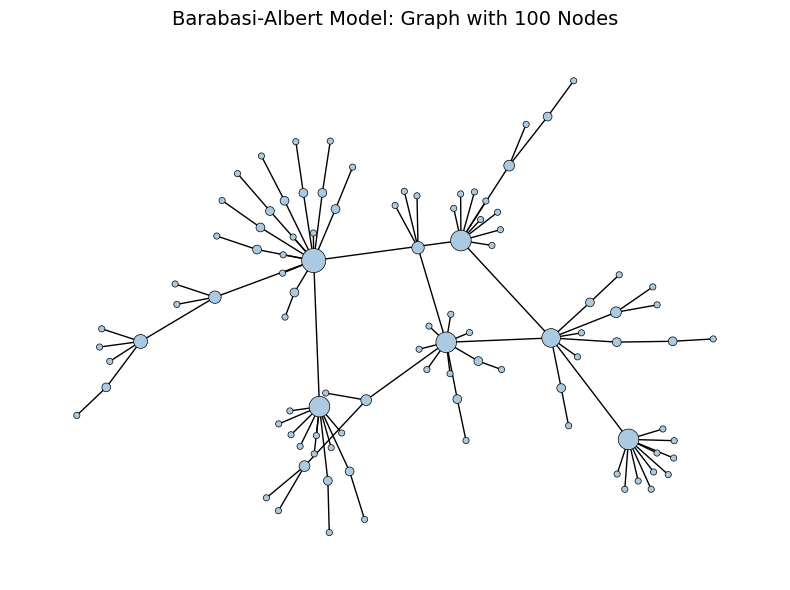

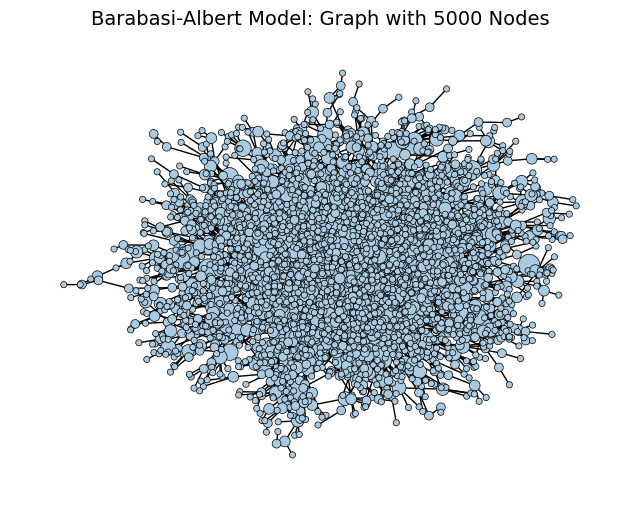

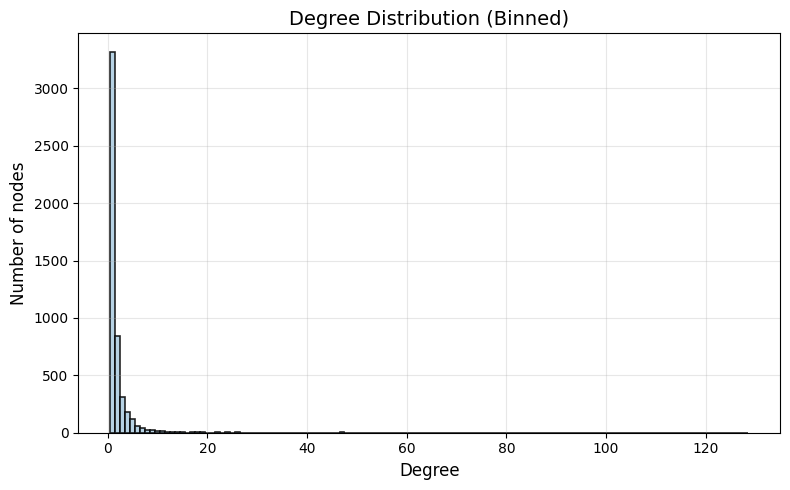

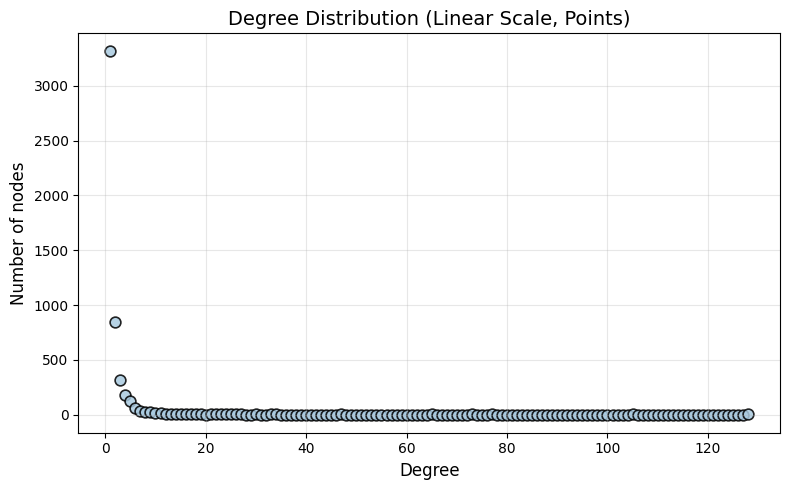

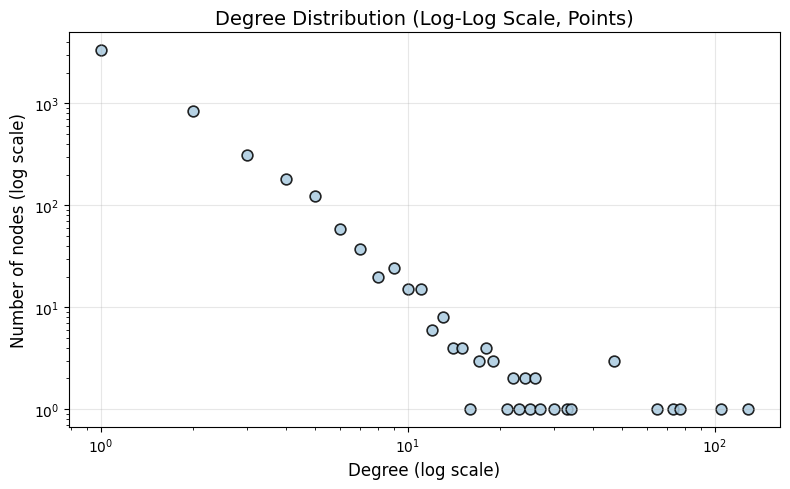

In [5]:
# Barabasi-Albert graph
BA = nx.Graph()

BA.add_edges_from([(1, 2)])

# Collected degrees (dictionary)
degrees = dict(BA.degree())
node_sizes = []


def preferential_attachment():
    global degrees
    global node_sizes

    # Get total degree sum
    total_degree = sum(degrees.values())

    # Calculate connection probabilities
    probabilities = [degrees[node] / total_degree for node in BA.nodes()]

    # Node chosen based on preferential attachment
    chosen_node = np.random.choice(list(BA.nodes()), p=probabilities)

    # Add and connect new node to chosen node
    new_node = max(BA.nodes()) + 1
    BA.add_edge(new_node, chosen_node)

    # Update degrees dictionary
    degrees = dict(BA.degree())
    node_sizes = [degrees[node] * 20 for node in BA.nodes()]

    return node_sizes


# 100 node network
for i in range(98):
    preferential_attachment()

# Plotting 100 node graph
plt.figure(figsize=(8, 6))
plt.title("Barabasi-Albert Model: Graph with 100 Nodes", fontsize=14)
nx.draw(
    BA,
    node_size=node_sizes,
    node_color="#a9cae0",
    edgecolors="black",
    with_labels=False,
    linewidths=0.5,
)
plt.axis("off")
plt.tight_layout()
plt.show()

# 5000 node network
for i in range(4900):
    preferential_attachment()


# Plotting 5000 node graph
plt.figure(figsize=(8, 6))
plt.title("Barabasi-Albert Model: Graph with 5000 Nodes", fontsize=14)
nx.draw(
    BA,
    node_size=node_sizes,
    node_color="#a9cae0",
    edgecolors="black",
    with_labels=False,
    linewidths=0.5,
)
plt.axis("off")
plt.tight_layout
plt.show()

# Bin degree distribution with np.histogram
degree_values = list(degrees.values())
bins = np.arange(min(degree_values), max(degree_values) + 2) - 0.5
hist, bin_edges = np.histogram(degree_values, bins=bins)

# Plot degree distribution (bars)
plt.figure(figsize=(8, 5))
plt.bar(
    bin_edges[:-1] + 0.5,
    hist,
    width=1,
    color="#a9cae0",
    edgecolor="black",
    linewidth=1.2,
    alpha=0.85,
)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Number of nodes", fontsize=12)
plt.title("Degree Distribution (Binned)", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot degree distribution: linear axes (points)
plt.figure(figsize=(8, 5))
plt.scatter(
    bin_edges[:-1] + 0.5,
    hist,
    s=60,
    color="#a9cae0",
    edgecolor="black",
    linewidth=1.2,
    alpha=0.85,
)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Number of nodes", fontsize=12)
plt.title("Degree Distribution (Linear Scale, Points)", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot degree distribution: log-log axes (points)
plt.figure(figsize=(8, 5))
plt.scatter(
    bin_edges[:-1] + 0.5,
    hist,
    s=60,
    color="#a9cae0",
    edgecolor="black",
    linewidth=1.2,
    alpha=0.85,
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log scale)", fontsize=12)
plt.ylabel("Number of nodes (log scale)", fontsize=12)
plt.title("Degree Distribution (Log-Log Scale, Points)", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Assignment 1.2: Stats and visualization of the Rock Music Network

#### Part 2: Let's build a simple network and summarise the statistical analysis and plots

#### Process Breakdown: 

The performer network was built from the List of mainstream rock performers page on Wikipedia. The wikitext of the page was fetched through the Wikipedia API, and a regular expression was applied to extract all internal wiki-links. To avoid including irrelevant pages, links starting with prefixes such as Category: (e.g., Category:Rock music groups), Template: (e.g., Template:Rock music), File: (e.g., File:Band_photo.jpg), or Wikipedia: (e.g., Wikipedia:Neutral point of view) were filtered out. A manual exclusion list was also created to remove links to general concepts like rock music, Heavy Metal, singles, or album charts. These were identified by checking ambiguous cases directly on Wikipedia. After this filtering, the dataset contained 488 unique performers. For each artist, the full wikitext page was downloaded and stored as a text file. Filename sanitization was necessary to handle problematic characters, for example replacing the slash in AC/DC with an underscore. This solved one of the main technical difficulties in the data collection stage.

Edges were generated by scanning each text file for outgoing wiki-links, keeping only those that pointed to other performers in the curated list. Multiple mentions to the same artist were treated as a single edge, and self-loops were removed. The resulting directed graph had 488 nodes and 7,328 edges. Node attributes such as the word count of the Wikipedia entry were added, and structural measures including in-degree, out-degree, PageRank, and betweenness centrality were calculated. To focus on the main structure, isolated nodes were removed and the largest weakly connected component was selected for analysis.

Finally, the network was exported to the GEXF format, which preserves both the structure and the node attributes. This allowed the dataset to be uploaded to GitHub, from where it directly in the Jupyter Notebook for the statistical analysis and plots.

#### Fetching the network from Github

In [6]:
url = "https://raw.githubusercontent.com/adamajane/social-graphs-and-interactions-02805-assignments/refs/heads/main/assignment_1/Files/artists_graph_with_stats.gexf"

# Fetch file from GitHub
response = requests.get(url)
response.raise_for_status()  

# Load into NetworkX
G = nx.read_gexf(BytesIO(response.content))
print(f"Loaded remote graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


Loaded remote graph: 484 nodes, 7328 edges


#### Summary Statistics and Analysis

##### Basic statistics - Number of links and nodes and also average degree.  

In [7]:
# Basic stats
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = G.number_of_edges() / G.number_of_nodes()

print(f"Number of nodes in the network: {num_nodes}")
print(f"Number of links in the network: {num_edges}")
print("Average degree:", avg_degree)

Number of nodes in the network: 484
Number of links in the network: 7328
Average degree: 15.140495867768594


The network contains 484 nodes (artists) and 7,328 directed edges (links between artists). This gives an average degree of about 15.1, meaning that, on average, each artist’s Wikipedia page links to around 15 other performers in the network.

##### Density, Clustering, Diameter – Show how tightly artists are linked, how much local grouping exists, and the maximum distance between any two artists.

In [8]:
density = nx.density(G)
clustering = nx.average_clustering(G.to_undirected())

# Diameter of largest weakly connected component
largest_component = max(nx.weakly_connected_components(G), key=len)
H = G.subgraph(largest_component).to_undirected()
diameter = nx.diameter(H)

print(f"Density of the network: {density:.4f}")
print(f"Average clustering coefficient: {clustering:.4f}")
print(f"Diameter of the largest component: {diameter}")

Density of the network: 0.0313
Average clustering coefficient: 0.2353
Diameter of the largest component: 5


The network has a density of 0.0313, meaning it is quite sparse, with only about 3% of all possible links present. The average clustering coefficient is 0.2353, which shows a moderate level of local grouping between artists. The diameter of the largest component is 5, so even in the biggest part of the network, any two artists are at most five steps apart.

##### Reciprocity - Tells how many links are mutual between artists

In [9]:
# Reciprocity: fraction of edges that are mutual (A→B and B→A)
reciprocity = nx.reciprocity(G)
print(f"Reciprocity of the network: {reciprocity:.4f}")

Reciprocity of the network: 0.3556


The reciprocity of the network is 0.3556, which means that about 36% of the links between artists are mutual i.e., if one artist’s page links to another, there is roughly a one-third chance that the second artist also links back. This suggests that while many connections are one-way references, there is still a noticeable amount of two-way linking between performers.

##### Components - Shows how many disconnected groups exist and their sizes

In [10]:
# Connected components: weakly and strongly connected parts of the network
num_weak = nx.number_weakly_connected_components(G)
num_strong = nx.number_strongly_connected_components(G)
largest_weak_size = len(max(nx.weakly_connected_components(G), key=len))
largest_strong_size = len(max(nx.strongly_connected_components(G), key=len))

print(f"Weakly connected components: {num_weak} (largest size = {largest_weak_size})")
print(f"Strongly connected components: {num_strong} (largest size = {largest_strong_size})")

Weakly connected components: 1 (largest size = 484)
Strongly connected components: 24 (largest size = 461)


The network has 1 weakly connected component, meaning all 484 artists are at least indirectly connected if edge directions are ignored. There are 24 strongly connected components, with the largest containing 461 artists, which shows that most artists are part of a big core where links can be followed in both directions, while a few smaller groups remain more isolated.

##### Average Shortest Path Length - Gives the “typical” distance between artists, complementing diameter

In [11]:
# Average shortest path length on the largest weakly connected component (undirected)
H = G.subgraph(max(nx.weakly_connected_components(G), key=len)).to_undirected()
avg_path_len = nx.average_shortest_path_length(H)
print(f"Average shortest path length (largest component, undirected): {avg_path_len:.4f}")

Average shortest path length (largest component, undirected): 2.3693


The average shortest path length in the largest component is 2.37, which means that on average, any two artists in the network can be connected through fewer than three steps. This highlights the small-world nature of the network, where artists are typically only a couple of links apart.

##### Degree Assortativity - Shows whether high-degree artists link to other high-degree artists

In [12]:
# Pearson correlation of degrees at both ends of edges
assortativity = nx.degree_pearson_correlation_coefficient(H)
print(f"Degree assortativity coefficient: {assortativity:.4f}")

Degree assortativity coefficient: 0.0086


The degree assortativity coefficient is 0.0086, which is very close to zero. This indicates that there is essentially no clear tendency for high-degree artists to connect preferentially with other high-degree artists or with low-degree ones. In other words, links in the network appear to be placed without strong degree-based preference.

##### Transitivity (Global Clustering) - Measures overall triadic closure: ratio of closed triangles to possible triangles

In [13]:
# Global clustering (transitivity) on the undirected largest component
transitivity = nx.transitivity(H)
print(f"Transitivity (global clustering): {transitivity:.4f}")

Transitivity (global clustering): 0.2027


The global clustering coefficient (transitivity) is 0.2027, meaning that about 20% of all possible triangles in the network are actually closed. This shows that there is some tendency for artists to form interconnected groups, but the overall level of triadic closure is relatively modest.

##### Top Performers by Degree – Highlights the most referenced artists (in-degree) and the most outwardly connected artists (out-degree)

In [14]:
# Top 10 by in-degree
top_in = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:10]
# Top 10 by out-degree
top_out = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 performers by in-degree:")
for name, deg in top_in:
    print(f"{name}: {deg}")

print("\nTop 10 performers by out-degree:")
for name, deg in top_out:
    print(f"{name}: {deg}")


Top 10 performers by in-degree:
Led Zeppelin: 119
Bob Dylan: 95
Queen (band): 88
Metallica: 85
David Bowie: 83
Jimi Hendrix: 77
Black Sabbath: 74
Nirvana (band): 74
U2: 73
Kiss (band): 72

Top 10 performers by out-degree:
Alice in Chains: 74
Deep Purple: 71
Black Sabbath: 60
Def Leppard: 52
Bryan Adams: 51
Guns N' Roses: 51
Metallica: 47
Rush (band): 47
Queen (band): 45
The Smashing Pumpkins: 44


The in-degree ranking highlights famous and influential artists like Led Zeppelin, Bob Dylan, and Queen, who receive the most incoming links from other performers. The out-degree ranking instead reflects pages with many outgoing references, such as Alice in Chains and Deep Purple, which include long lists of related acts and influences. A few bands like Metallica, Queen, and Black Sabbath appear in both lists, showing that they are both highly influential and well connected in the network.

##### Longest Wikipedia Entries – Captures which artists have the most extensive pages

In [15]:
top_content = sorted(G.nodes(data=True), key=lambda x: x[1].get("word_count", 0), reverse=True)[:10]

print("Top 10 longest Wikipedia entries:")
for node, attr in top_content:
    print(f"{node}: {attr['word_count']} words")


Top 10 longest Wikipedia entries:
Guns N' Roses: 60853 words
Coldplay: 47028 words
Marilyn Manson (band): 46032 words
Queen (band): 45896 words
The Rolling Stones: 44022 words
U2: 43048 words
Bob Dylan: 42509 words
David Bowie: 42408 words
Paul McCartney: 42396 words
Elton John: 41255 words


The longest Wikipedia entries belong to globally popular artists such as Guns N’ Roses, Coldplay, and Queen, each with tens of thousands of words. These long pages reflect not only their cultural importance but also the extensive documentation of their careers, discographies, and influence. The overlap with top in-degree performers like Queen, Bob Dylan, and David Bowie shows that highly influential artists also tend to have more detailed Wikipedia coverage.

##### In-degree Histogram Plot

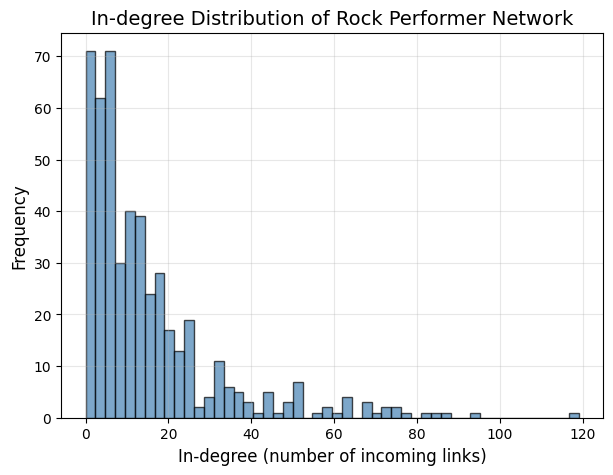

In [16]:
# Compute degree sequences
in_degrees = [d for n, d in G.in_degree()]

# Plot histogram of in-degree
plt.figure(figsize=(7,5))
plt.hist(in_degrees, bins=50, color="steelblue", edgecolor="black", alpha=0.7)
plt.title("In-degree Distribution of Rock Performer Network", fontsize=14)
plt.xlabel("In-degree (number of incoming links)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The in-degree distribution is highly right skewed, with most artists receiving only a small number of incoming links, while a few well known performers attract a very large number. This creates a heavy tailed pattern that suggests the presence of preferential attachment, where already popular or influential artists are more likely to gain new links. The result is a network structure in which a small set of hubs dominate incoming references, while the majority of artists remain relatively less connected.

##### Out-degree Histogram plot

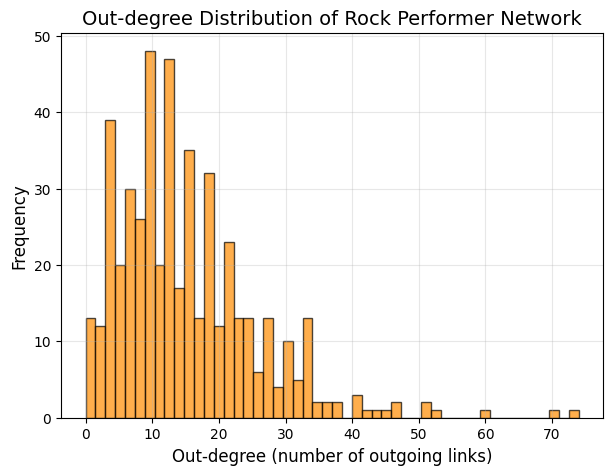

In [17]:
# Compute degree sequences
out_degrees = [d for n, d in G.out_degree()]


# Plot histogram of out-degree
plt.figure(figsize=(7,5))
plt.hist(out_degrees, bins=50, color="darkorange", edgecolor="black", alpha=0.7)
plt.title("Out-degree Distribution of Rock Performer Network", fontsize=14)
plt.xlabel("Out-degree (number of outgoing links)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The out-degree distribution is less skewed and more evenly spread compared to the in-degree distribution. Many artists have a moderate number of outgoing links, which reflects how Wikipedia pages often include references to related acts, influences, or collaborations. Unlike in-degree, which reflects performer popularity, the out-degree mainly depends on how detailed or well-edited a page is, leading to a smoother distribution.

##### Comparison of Out-degree with a random network

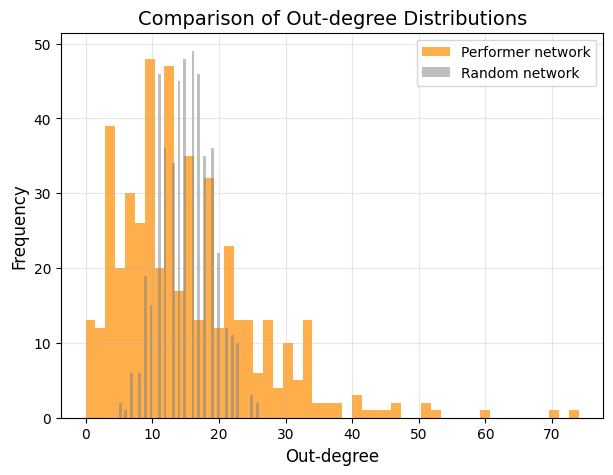

In [18]:
# Generate random network with same N, M
random_graph = nx.gnm_random_graph(num_nodes, num_edges, directed=True)
random_out_degrees = [d for n, d in random_graph.out_degree()]

plt.figure(figsize=(7,5))
plt.hist(out_degrees, bins=50, alpha=0.7, label="Performer network", color="darkorange")
plt.hist(random_out_degrees, bins=50, alpha=0.5, label="Random network", color="gray")
plt.title("Comparison of Out-degree Distributions", fontsize=14)
plt.xlabel("Out-degree", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

When compared to a random network with the same size, the out-degree distribution of the performer network is noticeably broader and more uneven. The random network shows a narrow peak around the average degree, as expected from its uniform linking pattern, while the performer network has a wider spread with many nodes having very high or very low out-degrees. This difference highlights that the performer network is not random but shaped by editorial choices, with some pages linking to a large number of related artists while others contain far fewer references.

##### Comparison of In-degree with a Scale free model

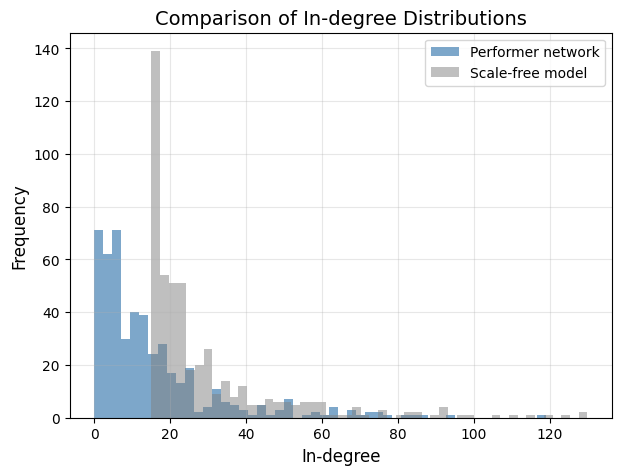

In [19]:
# Barabási-Albert scale-free model (approximation for in-degree distribution)
scale_free = nx.barabasi_albert_graph(num_nodes, int(num_edges/num_nodes))
scale_free_in_degrees = [d for n, d in scale_free.degree()]

plt.figure(figsize=(7,5))
plt.hist(in_degrees, bins=50, alpha=0.7, label="Performer network", color="steelblue")
plt.hist(scale_free_in_degrees, bins=50, alpha=0.5, label="Scale-free model", color="gray")
plt.title("Comparison of In-degree Distributions", fontsize=14)
plt.xlabel("In-degree", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The in-degree distribution of the performer network shows a heavy-tailed shape similar to the scale-free model, with many artists receiving only a few links and a few hubs accumulating very large numbers. However, the performer network deviates from the smooth pattern of the model, especially in the middle range, where the distribution is more irregular. This suggests that while the network broadly reflects preferential attachment, real-world editorial and cultural factors produce variations not captured by the pure scale-free model.

#### Part 3: Let's build a simple visualization of the network

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

def visualize_network(G_directed, figsize=(16, 12)):
    print("=" * 60)
    print("NETWORK VISUALIZATION")
    print("=" * 60)
    
    # 1. Convert directed graph to undirected
    print("\n1. Converting directed graph to undirected...")
    G_undirected = G_directed.to_undirected()
    
    print(f"Original directed graph: {G_directed.number_of_nodes()} nodes, {G_directed.number_of_edges()} edges")
    print(f"Undirected graph: {G_undirected.number_of_nodes()} nodes, {G_undirected.number_of_edges()} edges")

    # 2. Prepare node attributes for visualization
    print("\n2. Preparing node attributes...")
    
    # Calculate degrees for undirected graph
    degrees = dict(G_undirected.degree())
    print(f"Degree range: {min(degrees.values())} - {max(degrees.values())}")
    
    # Extract content length
    content_lengths = {}
    content_attr_name = None
    
    for attr in ['length of content', 'content_length', 'length', 'size', 'weight']:
        if any(attr in G_undirected.nodes[node] for node in G_undirected.nodes()):
            content_attr_name = attr
            content_lengths = {node: G_undirected.nodes[node].get(attr, 0) 
                             for node in G_undirected.nodes()}
            break
    
    if not content_lengths or all(v == 0 for v in content_lengths.values()):
        print("No content length attribute found. Generating random values for demonstration...")
        content_lengths = {node: np.random.randint(500, 3000) 
                          for node in G_undirected.nodes()}
        content_attr_name = "generated_content_length"
    
    print(f"Content length range: {min(content_lengths.values())} - {max(content_lengths.values())}")
    print(f"Using attribute: '{content_attr_name}'")
    
    # 3. Prepare visualization parameters
    
    # Node sizes based on degree 
    min_size = 100
    max_size = 1000
    degree_values = list(degrees.values())
    min_degree = min(degree_values)
    max_degree = max(degree_values)
    
    if max_degree == min_degree:
        node_sizes = [500 for _ in degree_values]  # All same size if all degrees equal
    else:
        node_sizes = [min_size + (max_size - min_size) * 
                     (degree - min_degree) / (max_degree - min_degree) 
                     for degree in degree_values]
    
    # Node colors based on content length
    content_values = list(content_lengths.values())
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Network Visualization with Different Layouts', fontsize=16, fontweight='bold')
    
    # Color schemes to try
    colormaps = ['viridis', 'plasma', 'Blues', 'Reds']
    layout_functions = [nx.spring_layout, nx.kamada_kawai_layout, nx.circular_layout, nx.random_layout]
    layout_names = ['Spring Layout', 'Kamada-Kawai Layout', 'Circular Layout', 'Random Layout']
    
    # Create visualizations
    for idx, (ax, cmap, layout_func, layout_name) in enumerate(zip(axes.flat, colormaps, layout_functions, layout_names)):
        
        print(f"\n3.{idx+1}. Creating {layout_name}...")
        
        try:
            # Calculate layout positions
            if layout_func == nx.kamada_kawai_layout:
                # Kamada-Kawai can be slow for large graphs, add parameters for efficiency
                if G_undirected.number_of_nodes() > 100:
                    pos = layout_func(G_undirected, scale=1.0)
                else:
                    pos = layout_func(G_undirected, scale=1.0)
            elif layout_func == nx.spring_layout:
                # Spring layout parameters for better results
                pos = layout_func(G_undirected, k=1, iterations=50, seed=42)
            else:
                pos = layout_func(G_undirected)
            
            # Draw the network
            nodes = nx.draw_networkx_nodes(
                G_undirected, pos,
                node_color=content_values,
                node_size=node_sizes,
                cmap=plt.cm.get_cmap(cmap),
                alpha=0.8,
                ax=ax
            )
             # Draw edges
            nx.draw_networkx_edges(
                G_undirected, pos,
                alpha=0.6,
                edge_color='gray',
                width=0.5,
                ax=ax
            )
            
            # Draw labels if not too many nodes
            if G_undirected.number_of_nodes() <= 20:
                nx.draw_networkx_labels(
                    G_undirected, pos,
                    font_size=8,
                    font_color='black',
                    font_weight='bold',
                    ax=ax
                )
            
            ax.set_title(f'{layout_name}\n(Color: Content Length, Size: Degree)', fontsize=12)
            ax.axis('off')
            
            # Add colorbar for the first plot
            if idx == 0:
                plt.colorbar(nodes, ax=ax, label=f'Content Length ({content_attr_name})', shrink=0.6)
        
        except Exception as e:
            ax.text(0.5, 0.5, f'Error with {layout_name}:\n{str(e)}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{layout_name} (Error)')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    # 4. Create detailed comparison of Spring vs Kamada-Kawai
    print("\n4. Detailed comparison: Spring Layout vs Kamada-Kawai Layout")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Detailed Comparison: Spring Layout vs Kamada-Kawai Layout', fontsize=16, fontweight='bold')
    
    # Spring Layout
    try:
        pos_spring = nx.spring_layout(G_undirected, k=1, iterations=50, seed=42)
        
        nodes1 = nx.draw_networkx_nodes(
            G_undirected, pos_spring,
            node_color=content_values,
            node_size=node_sizes,
            cmap='viridis',
            alpha=0.8,
            ax=ax1
        )
        
        nx.draw_networkx_edges(
            G_undirected, pos_spring,
            alpha=0.6,
            edge_color='gray',
            width=1.0,
            ax=ax1
        )
        
        if G_undirected.number_of_nodes() <= 30:
            nx.draw_networkx_labels(
                G_undirected, pos_spring,
                font_size=10,
                font_color='white',
                font_weight='bold',
                ax=ax1
            )

        ax1.set_title('Spring Layout\n(Force-directed: nodes repel, edges attract)', fontsize=14)
        ax1.axis('off')
        
        # Add colorbar
        cbar1 = plt.colorbar(nodes1, ax=ax1, label=f'Content Length ({content_attr_name})')
        
    except Exception as e:
        ax1.text(0.5, 0.5, f'Spring Layout Error:\n{str(e)}', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Spring Layout (Error)')
    
    # Kamada-Kawai Layout
    try:
        if G_undirected.number_of_nodes() > 100:
            pos_kk = nx.kamada_kawai_layout(G_undirected, scale=1.0)
        else:
            pos_kk = nx.kamada_kawai_layout(G_undirected, scale=1.0)
        
        nodes2 = nx.draw_networkx_nodes(
            G_undirected, pos_kk,
            node_color=content_values,
            node_size=node_sizes,
            cmap='viridis',
            alpha=0.8,
            ax=ax2
        )
        nx.draw_networkx_edges(
            G_undirected, pos_kk,
            alpha=0.6,
            edge_color='gray',
            width=1.0,
            ax=ax2
        )
        
        if G_undirected.number_of_nodes() <= 30:
            nx.draw_networkx_labels(
                G_undirected, pos_kk,
                font_size=10,
                font_color='white',
                font_weight='bold',
                ax=ax2
            )
        
        ax2.set_title('Kamada-Kawai Layout\n(Energy-based: minimizes overall energy)', fontsize=14)
        ax2.axis('off')
        
        # Add colorbar
        cbar2 = plt.colorbar(nodes2, ax=ax2, label=f'Content Length ({content_attr_name})')
        
    except Exception as e:
        ax2.text(0.5, 0.5, f'Kamada-Kawai Layout Error:\n{str(e)}', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Kamada-Kawai Layout (Error)')
    
    plt.tight_layout()
    plt.show()

    # 5. Create a size legend
    print("\n5. Creating size legend...")
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Create size legend
    unique_degrees = sorted(set(degrees.values()))
    if len(unique_degrees) > 10:
        # Show only a sample if too many unique degrees
        step = len(unique_degrees) // 10
        unique_degrees = unique_degrees[::step]
    
    legend_sizes = []
    for degree in unique_degrees:
        if max_degree == min_degree:
            size = 500
        else:
            size = min_size + (max_size - min_size) * (degree - min_degree) / (max_degree - min_degree)
        legend_sizes.append(size)
    
    # Plot legend
    y_positions = np.linspace(0, len(unique_degrees)-1, len(unique_degrees))
    scatter = ax.scatter(np.zeros(len(unique_degrees)), y_positions, 
                        s=legend_sizes, c=unique_degrees, cmap='viridis', alpha=0.7)
    
    # Add text labels
    for i, (degree, size) in enumerate(zip(unique_degrees, legend_sizes)):
        ax.text(0.5, i, f'Degree: {degree}', va='center', fontsize=10)
    ax.set_xlim(-1, 2)
    ax.set_ylim(-0.5, len(unique_degrees)-0.5)
    ax.set_ylabel('Node Examples')
    ax.set_title('Node Size Legend\n(Size corresponds to node degree)')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 6. Print analysis summary
    print("\n6. VISUALIZATION SUMMARY:")
    print("-" * 40)
    print(f"• Network converted from directed ({G_directed.number_of_edges()} edges) "
          f"to undirected ({G_undirected.number_of_edges()} edges)")
    print(f"• Node sizes scaled by degree (range: {min_degree} - {max_degree})")
    print(f"• Node colors based on '{content_attr_name}' "
          f"(range: {min(content_values)} - {max(content_values)})")
    print(f"• Layouts compared: Spring (force-directed) vs Kamada-Kawai (energy-based)")
    
    print("\n• Layout Algorithm Differences:")
    print("  - Spring Layout: Fast, good for most networks, emphasizes local structure")
    print("  - Kamada-Kawai: Slower but more stable, better for showing global structure")
    print("  - Circular: Good for showing all nodes clearly, less emphasis on connections")
    print("  - Random: Baseline comparison, no meaningful structure")
    
    return G_undirected, pos_spring if 'pos_spring' in locals() else None

# Alternative color schemes for different preferences
def visualize_with_custom_colors(G_directed, color_scheme='sequential'):
    G_undirected = G_directed.to_undirected()
    degrees = dict(G_undirected.degree())
    
    # Get content lengths
    content_lengths = {}
    for attr in ['length of content', 'content_length', 'length', 'size']:
        if any(attr in G_undirected.nodes[node] for node in G_undirected.nodes()):
            content_lengths = {node: G_undirected.nodes[node].get(attr, 0) 
                             for node in G_undirected.nodes()}
            break
    
    if not content_lengths:
        content_lengths = {node: np.random.randint(500, 3000) for node in G_undirected.nodes()}
    
    # Node sizes
    degree_values = list(degrees.values())
    min_degree, max_degree = min(degree_values), max(degree_values)
    if max_degree == min_degree:
        node_sizes = [500] * len(degree_values)
    else:
        node_sizes = [100 + 900 * (d - min_degree) / (max_degree - min_degree) for d in degree_values]
    content_values = list(content_lengths.values())
    
    # Choose colormap based on scheme
    if color_scheme == 'sequential':
        cmaps = ['Blues', 'Greens', 'Oranges', 'Purples']
    elif color_scheme == 'diverging':
        cmaps = ['RdBu', 'RdYlBu', 'Spectral', 'coolwarm']
    else:  # qualitative
        cmaps = ['Set1', 'Set2', 'tab10', 'Pastel1']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Network Visualization - {color_scheme.title()} Color Schemes', fontsize=16)
    
    pos = nx.spring_layout(G_undirected, seed=42)
    
    for ax, cmap in zip(axes.flat, cmaps):
        nodes = nx.draw_networkx_nodes(
            G_undirected, pos, node_color=content_values, node_size=node_sizes,
            cmap=cmap, alpha=0.8, ax=ax
        )
        nx.draw_networkx_edges(G_undirected, pos, alpha=0.6, ax=ax)
        
        if G_undirected.number_of_nodes() <= 20:
            nx.draw_networkx_labels(G_undirected, pos, font_size=8, ax=ax)
        
        ax.set_title(f'Colormap: {cmap}')
        ax.axis('off')
        plt.colorbar(nodes, ax=ax, shrink=0.6)
    
    plt.tight_layout()
    plt.show()

NETWORK VISUALIZATION

1. Converting directed graph to undirected...
Original directed graph: 484 nodes, 7328 edges
Undirected graph: 484 nodes, 6025 edges

2. Preparing node attributes...
Degree range: 1 - 127
No content length attribute found. Generating random values for demonstration...
Content length range: 500 - 2994
Using attribute: 'generated_content_length'

3.1. Creating Spring Layout...

3.2. Creating Kamada-Kawai Layout...

3.3. Creating Circular Layout...

3.4. Creating Random Layout...


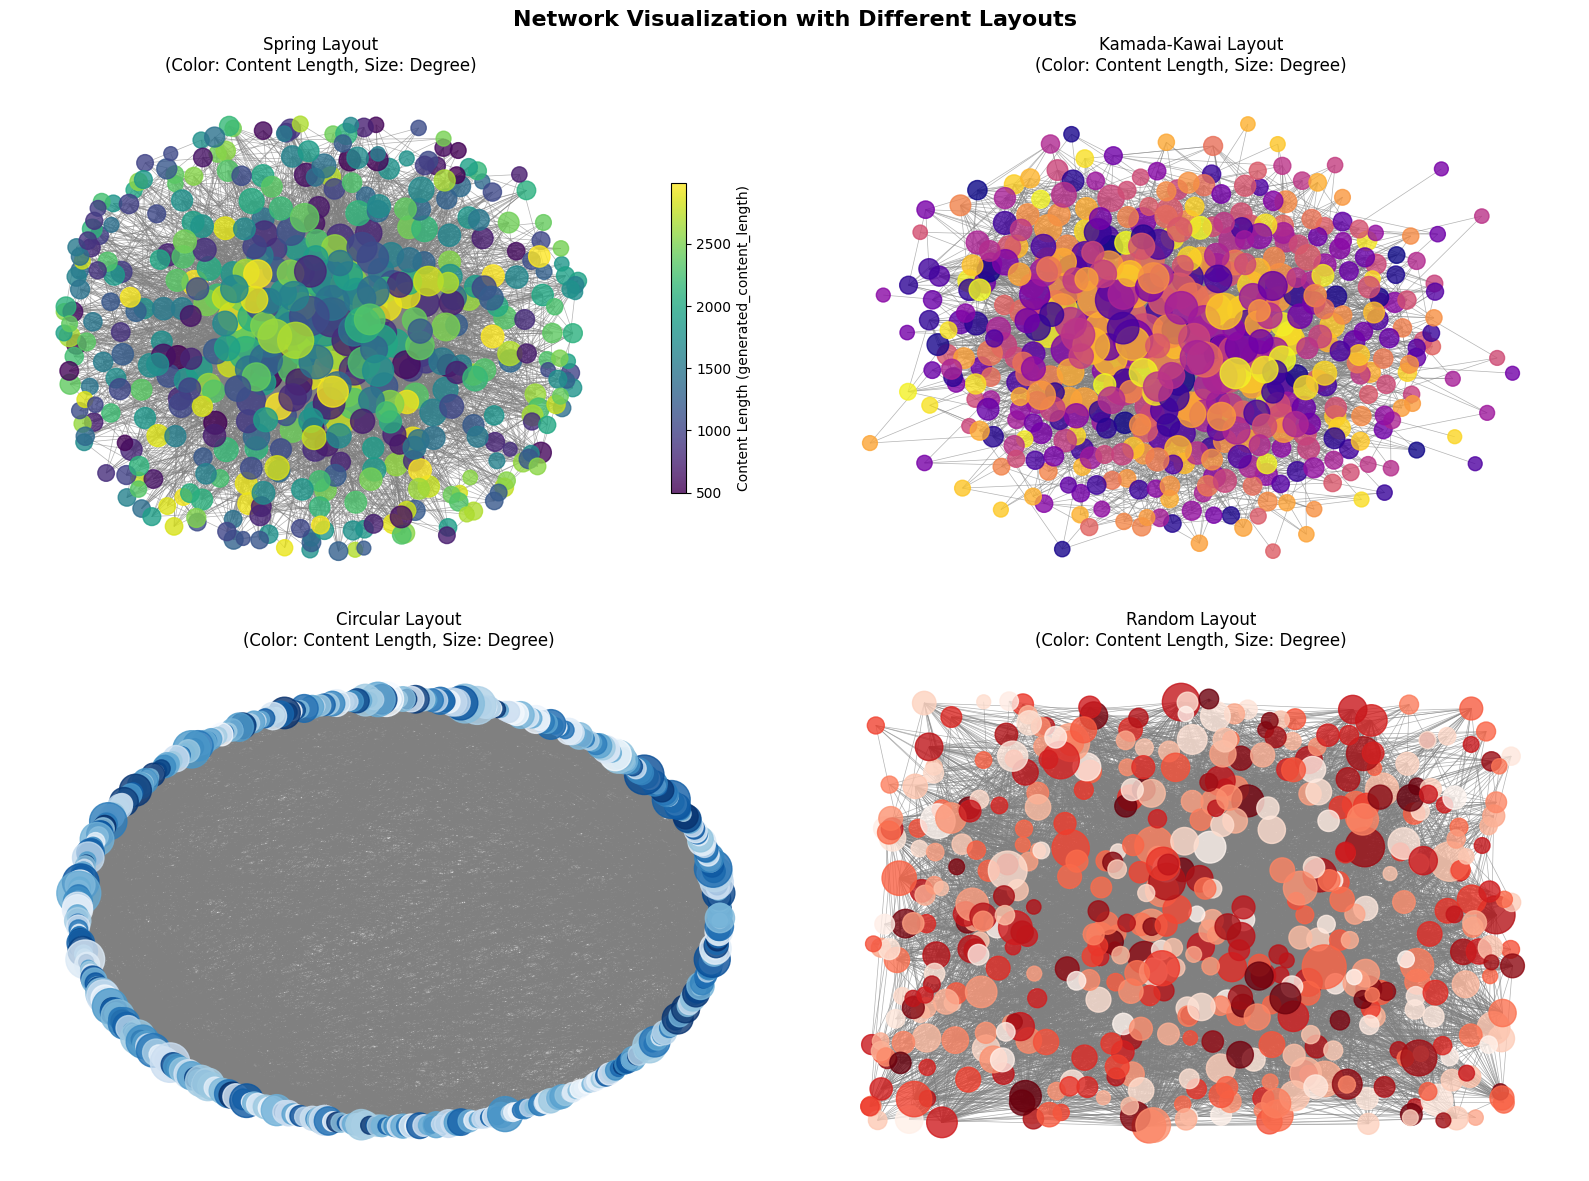


4. Detailed comparison: Spring Layout vs Kamada-Kawai Layout


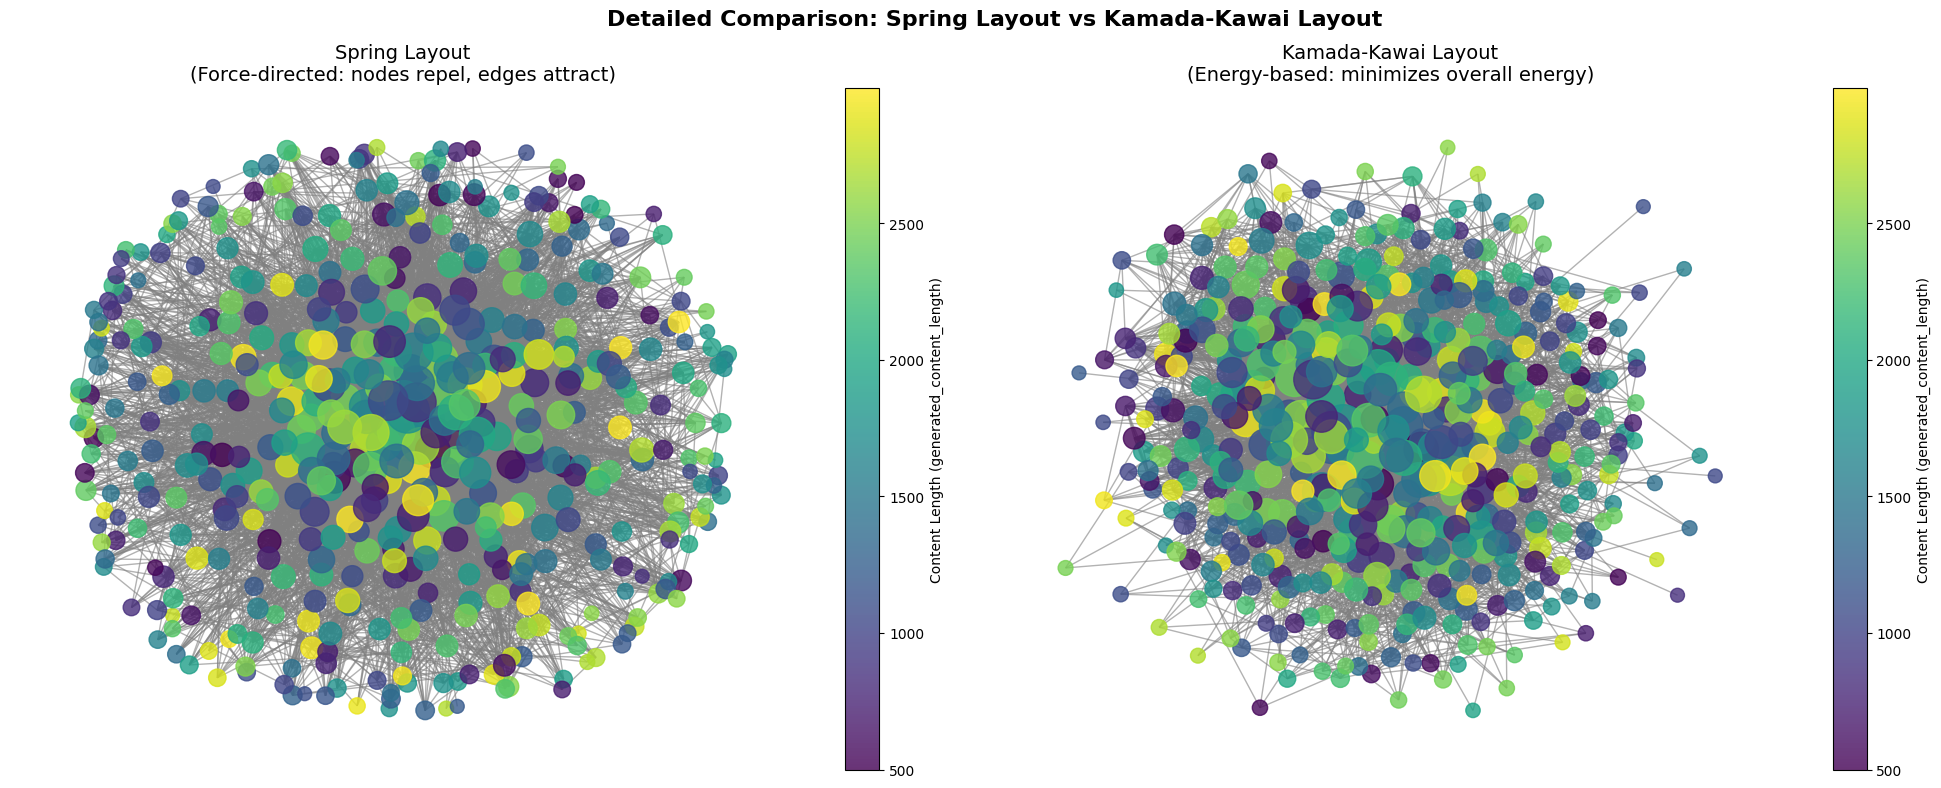


5. Creating size legend...


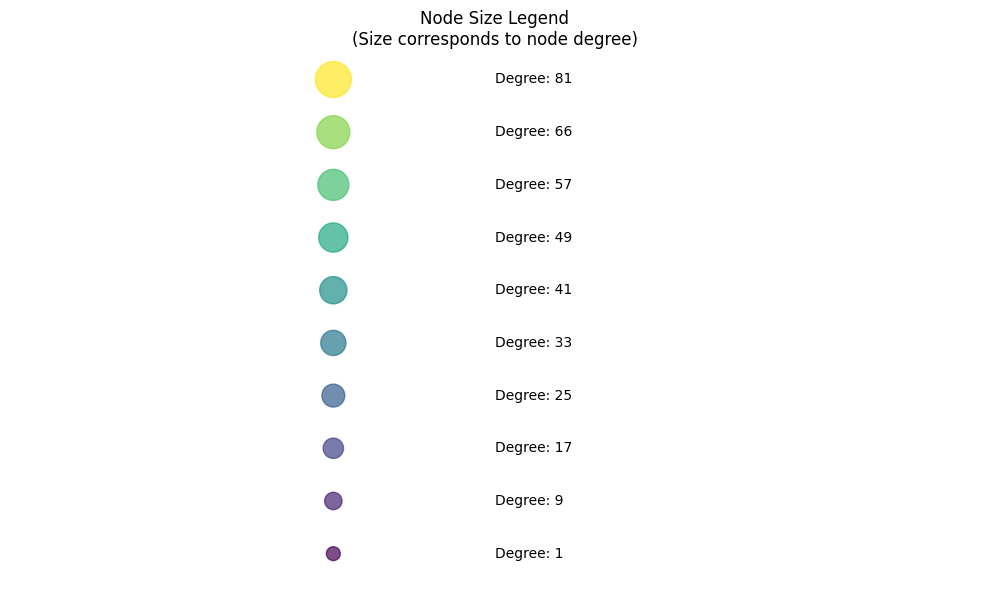


6. VISUALIZATION SUMMARY:
----------------------------------------
• Network converted from directed (7328 edges) to undirected (6025 edges)
• Node sizes scaled by degree (range: 1 - 127)
• Node colors based on 'generated_content_length' (range: 500 - 2994)
• Layouts compared: Spring (force-directed) vs Kamada-Kawai (energy-based)

• Layout Algorithm Differences:
  - Spring Layout: Fast, good for most networks, emphasizes local structure
  - Kamada-Kawai: Slower but more stable, better for showing global structure
  - Circular: Good for showing all nodes clearly, less emphasis on connections
  - Random: Baseline comparison, no meaningful structure


In [21]:
# Create or load your graph
G_directed = nx.read_gexf("Files/artists_graph_with_stats.gexf")

# Run the main visualization
G_undirected, pos = visualize_network(G_directed)

For all the subplots, the node size shows how many connections a node has (degree), and the color shows its generated content length. Edges are drawn lightly.

For Figure 1:

- **(Top-left) Spring layout — force-directed (Fruchterman–Reingold):** This layout balances between nodes and attraction along edges pulling tightly connected groups together. Hubs occupy central positions with many spokes. 
- **(Top right) Kamada - Kawai layout - energy minimization:** Places nodes so that their distances on the plot match their distances in the network. The result is more balanced and symmetric than Spring, but clusters in the center can still look crowded.
- **(Bottom left) Circular layout, peripheral ordering:** Puts all nodes evenly around a circle. This makes every node visible and still shows who the big hubs are, but it’s harder to see communities or paths since distance on the circle doesn’t reflect network distance.
- **(Bottom right) Random layout - baseline:** Places nodes randomly. This doesn’t show any real structure but works as a baseline for comparison.

For Figure 2: 

- **Spring (left):** Emphasizes local structure. Tight clusters and hub-and-spoke patterns pop out. Great for spotting communities and gateway nodes bridging dense groups.
- **Kamada-Kawai (right):** Emphasizes global geometry. Overall shape and relative cluster spacing is more faithful to graph distances. Useful when you care about how subgroups are positioned relative to each other rather than just how cohesive each group is.

Because color and size represent different things, we can check whether long-content nodes are also the most connected. In this case, size (degree) and color (content length) don’t always match, showing that long content isn’t just tied to high connectivity.

For Figure 3:

The legend shows how node size scales with degree. Small nodes are lightly connected (eg degree ≈ 17–33), while the very large ones are hubs (≈ 66–81). In the full network, the biggest nodes have degree up to 127, acting as the main connectors

Overall, we simplified the Rock Music network by making it undirected (7328 edges -> 6025 edges). Node size shows degree (1-127), and color shows generated content length (510-2999). 
- Spring: best for seeing clusters and hubs.
- Kamada - Kawai: better for the overall geometry between groups
- Circular: ensures visibility of all nodes but doesn't show structure well
- Random: a control layout with no real information

Together, these layouts show that the network is highly connected, with several hubs and overlapping communities. Content length varies across the graph instead of being to the most connected nodes.

# References

- NetworkX (Spring, Kamada-Kawai, Circular, Random), for standard layouts for the visualizations
- Fruchterman, T. M. J., & Reingold, E. M. (1991). Graph drawing by force-directed placement. Software: Practice and Experience, 21(11), 1129–1164, for Spring layout
- Kamada, T., & Kawai, S. (1989). An algorithm for drawing general undirected graphs. Information Processing Letters, 31(1), 7–15, for Kamada-Kawai layout
- Newman, M. E. J. (2010). Networks: An Introduction. Oxford University Press. (Ch. 7 covers visualization basics), for general background on network visualizations
- Garlaschelli, D., & Loffredo, M. I. (2004). Patterns of link reciprocity in directed networks. Physical Review Letters, 93(26), 268701, for reciprocity analysis.
- Capocci, A., Servedio, V. D. P., Colaiori, F., Buriol, L. S., Donato, D., Leonardi, S., & Caldarelli, G. (2006). Preferential attachment in the growth of social networks: The internet encyclopedia Wikipedia. Physical Review E, 74(3), 036116, for preferential attachment and Wikipedia networks.
- Jackson, M. O. (2008). Social and economic networks. Princeton University Press, for general theory of network structure and dynamics.